In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [ ]:
"""
    ICRS: RA - 12:29:06.6998257176     DEC - +02:03:08.597629980
    Read in the fits file
    Should be 31 objects
"""

# file = 'GalaxySurvey.fits'
file = 'Spectra/spec-0519-52283-0021.fits'

hdu = fits.open(file)
# hdu.info()
data = hdu[1].data
# print(hdu[0].header)
# print(hdu[1].header)
# print(hdu[2].header)
# print(data.columns.names)
# print(data[:1])

In [ ]:
print(f"COADD columns: {hdu[1].columns.names} \n")
print(f"SPECOBJ columns: {hdu[2].columns.names} \n")
print(f"SPZLINE columns: {hdu[3].columns.names} \n")

In [ ]:
# Extract object ID
obj_id = hdu[2].data['objid']
print(f"Object ID: {obj_id}")

# Extract the object class and subclass
obj_type = hdu[2].data['class']
obj_subtype = hdu[2].data['subclass']
print(f"Object type: {obj_type} and subtype: {obj_subtype}")


# Extract the flux and wavelength for plotting
SpectrumTab = Table(data)
wavelength = np.array(10**SpectrumTab['loglam'])    # Convert wavelength from log to linear in Angstrom
flux = np.array(SpectrumTab['flux'])

# Extract the redshift z
z = hdu[2].data['z']
print(f"Redshift of the spectrum: {z}")

# Wavelength calibration
wavelength = wavelength / (1 + z)

# Plot the spectrum
plt.plot(wavelength, flux, 'k-', label='Spectrum')


# Plot the spectrum lines
SpecLinesTab = Table(hdu[3].data)
line_names = SpecLinesTab['LINENAME']
line_wavelengths = np.array(SpecLinesTab['LINEWAVE'])


for wave, name in zip(line_wavelengths, line_names):
    if wavelength.min() <= wave <= wavelength.max():
        plt.axvline(x=wave, color='red', linestyle='--', alpha=0.7)
        plt.text(wave, max(flux) * 0.9, str(name), rotation=90, verticalalignment='bottom', fontsize=8, color='red')

plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel('Flux')
plt.title('Spectrum')
plt.grid(True)
plt.show()


Processing file: Spectra/spec-4752-55653-0217.fits
Object ID: ['1237651735760142828']
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.5786811709403992
Estimated Distance: 2478.35 Mpc
Line: Mg_II 2799, Wavelength: 2800.32 Å, FWHM: 622.72 Å, Velocity Width: 66665.92 km/s
Equivalent Width of Mg_II 2799: 8.00 Å
Line: [O_II] 3725, Wavelength: 3727.09 Å, FWHM: 622.72 Å, Velocity Width: 50088.81 km/s
Equivalent Width of [O_II] 3725: -2.32 Å
Line: [O_II] 3727, Wavelength: 3729.88 Å, FWHM: 622.72 Å, Velocity Width: 50051.42 km/s
Equivalent Width of [O_II] 3727: -2.85 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 622.72 Å, Velocity Width: 48240.95 km/s
Equivalent Width of [Ne_III] 3868: 3.32 Å
Line: H_zeta, Wavelength: 3890.17 Å, FWHM: 596.28 Å, Velocity Width: 45952.01 km/s
Equivalent Width of H_zeta: 0.94 Å
Line: [Ne_III] 3970, Wavelength: 3968.59 Å, FWHM: 622.72 Å, Velocity Width: 47040.75 km/s
Equivalent Width of [Ne_III] 3970: 4.00 Å
Line: H_epsilon, Wavelength:

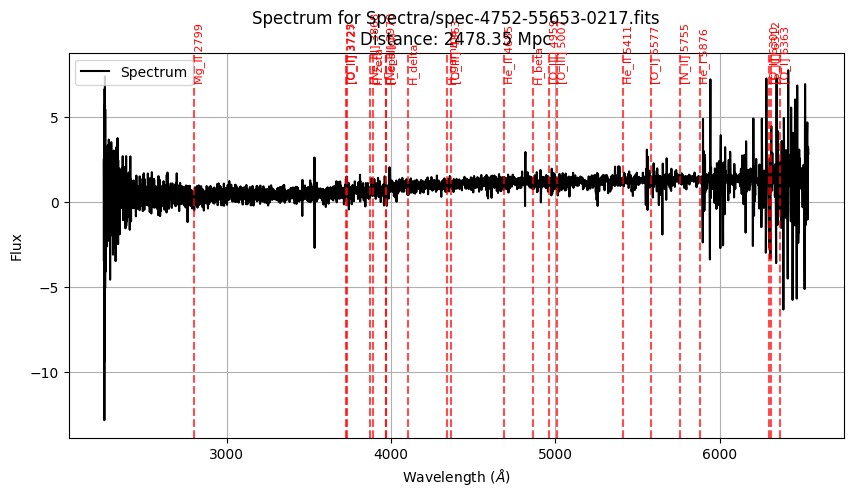


Processing file: Spectra/spec-4752-55653-0277.fits
Object ID: ['1237651735760142743']
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.545875608921051
Estimated Distance: 2337.85 Mpc
Line: Mg_II 2799, Wavelength: 2800.32 Å, FWHM: 197.88 Å, Velocity Width: 21184.48 km/s
Equivalent Width of Mg_II 2799: 8.73 Å
Line: [O_II] 3725, Wavelength: 3727.09 Å, FWHM: 197.88 Å, Velocity Width: 15916.76 km/s
Equivalent Width of [O_II] 3725: 2.71 Å
Line: [O_II] 3727, Wavelength: 3729.88 Å, FWHM: 197.88 Å, Velocity Width: 15904.88 km/s
Equivalent Width of [O_II] 3727: 2.37 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 197.88 Å, Velocity Width: 15329.57 km/s
Equivalent Width of [Ne_III] 3868: 2.78 Å
Line: H_zeta, Wavelength: 3890.17 Å, FWHM: 277.33 Å, Velocity Width: 21372.46 km/s
Equivalent Width of H_zeta: 1.64 Å
Line: [Ne_III] 3970, Wavelength: 3968.59 Å, FWHM: 197.88 Å, Velocity Width: 14948.18 km/s
Equivalent Width of [Ne_III] 3970: 4.68 Å
Line: H_epsilon, Wavelength: 39

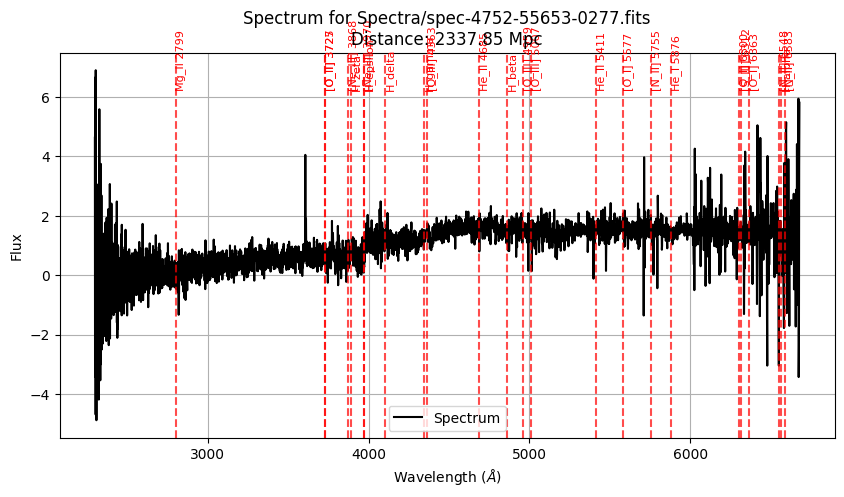


Processing file: Spectra/spec-0520-52288-0270.fits
Object ID: [[1458    2    2  416  164]]
Object type: ['GALAXY'] and subtype: ['BROADLINE']
Redshift of the spectrum: 0.15886476635932922
Estimated Distance: 680.38 Mpc
Line: [O_II] 3725  , Wavelength: 3727.09 Å, FWHM: 698.66 Å, Velocity Width: 56197.40 km/s
Equivalent Width of [O_II] 3725  : 3.60 Å
Line: [O_II] 3727  , Wavelength: 3729.88 Å, FWHM: 698.66 Å, Velocity Width: 56155.46 km/s
Equivalent Width of [O_II] 3727  : 3.95 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 698.66 Å, Velocity Width: 54124.19 km/s
Equivalent Width of [Ne_III] 3868: 4.54 Å
Line: H_epsilon    , Wavelength: 3890.15 Å, FWHM: 529.63 Å, Velocity Width: 40815.70 km/s
Equivalent Width of H_epsilon    : 4.98 Å
Line: [Ne_III] 3970, Wavelength: 3971.12 Å, FWHM: 698.66 Å, Velocity Width: 52743.99 km/s
Equivalent Width of [Ne_III] 3970: 6.30 Å
Line: H_delta      , Wavelength: 4102.89 Å, FWHM: 529.63 Å, Velocity Width: 38699.35 km/s
Equivalent Width of H_delta   

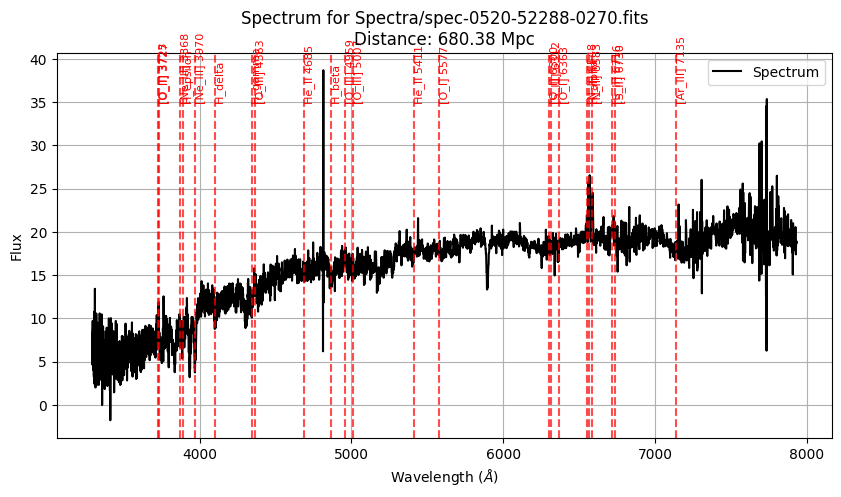


Processing file: Spectra/spec-0519-52283-0023.fits
Object ID: [[1462    1    3  413   75]]
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.07779926061630249
Estimated Distance: 333.19 Mpc
Line: [O_II] 3725  , Wavelength: 3727.09 Å, FWHM: 816.52 Å, Velocity Width: 65677.47 km/s
Equivalent Width of [O_II] 3725  : 4.92 Å
Line: [O_II] 3727  , Wavelength: 3729.88 Å, FWHM: 816.52 Å, Velocity Width: 65628.45 km/s
Equivalent Width of [O_II] 3727  : 5.50 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 816.52 Å, Velocity Width: 63254.53 km/s
Equivalent Width of [Ne_III] 3868: 5.97 Å
Line: H_epsilon    , Wavelength: 3890.15 Å, FWHM: 553.81 Å, Velocity Width: 42678.94 km/s
Equivalent Width of H_epsilon    : 5.74 Å
Line: [Ne_III] 3970, Wavelength: 3971.12 Å, FWHM: 816.52 Å, Velocity Width: 61641.49 km/s
Equivalent Width of [Ne_III] 3970: 6.22 Å
Line: H_delta      , Wavelength: 4102.89 Å, FWHM: 553.81 Å, Velocity Width: 40465.98 km/s
Equivalent Width of H_delta      : 4.24

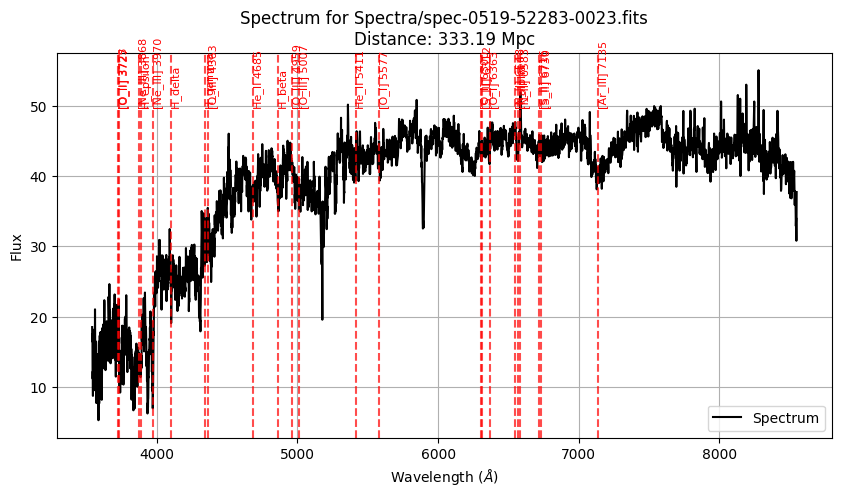


Processing file: Spectra/spec-0519-52283-0039.fits
Object ID: [[1462    1    3  412  210]]
Object type: ['GALAXY'] and subtype: ['STARFORMING']
Redshift of the spectrum: 0.032827772200107574
Estimated Distance: 140.59 Mpc
Line: [O_II] 3725  , Wavelength: 3727.09 Å, FWHM: 168.28 Å, Velocity Width: 13535.97 km/s
Equivalent Width of [O_II] 3725  : -14.48 Å
Line: [O_II] 3727  , Wavelength: 3729.88 Å, FWHM: 168.28 Å, Velocity Width: 13525.87 km/s
Equivalent Width of [O_II] 3727  : -13.61 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 168.28 Å, Velocity Width: 13036.61 km/s
Equivalent Width of [Ne_III] 3868: -3.29 Å
Line: H_epsilon    , Wavelength: 3890.15 Å, FWHM: 171.40 Å, Velocity Width: 13208.56 km/s
Equivalent Width of H_epsilon    : 1.03 Å
Line: [Ne_III] 3970, Wavelength: 3971.12 Å, FWHM: 168.28 Å, Velocity Width: 12704.17 km/s
Equivalent Width of [Ne_III] 3970: 3.55 Å
Line: H_delta      , Wavelength: 4102.89 Å, FWHM: 171.40 Å, Velocity Width: 12523.67 km/s
Equivalent Width of H_

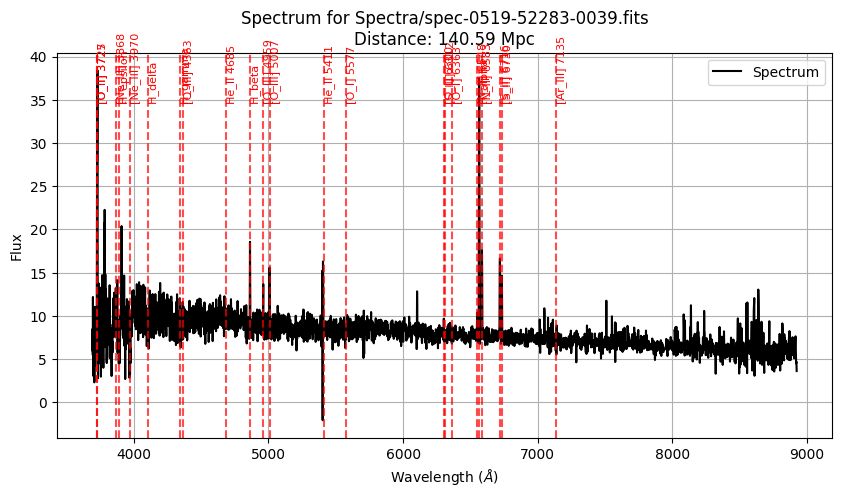


Processing file: Spectra/spec-0519-52283-0028.fits
Object ID: [[1462    1    3  414  111]]
Object type: ['GALAXY'] and subtype: ['STARFORMING']
Redshift of the spectrum: 0.14656785130500793
Estimated Distance: 627.71 Mpc
Line: [O_II] 3725  , Wavelength: 3727.09 Å, FWHM: 285.21 Å, Velocity Width: 22941.46 km/s
Equivalent Width of [O_II] 3725  : -3.79 Å
Line: [O_II] 3727  , Wavelength: 3729.88 Å, FWHM: 285.21 Å, Velocity Width: 22924.34 km/s
Equivalent Width of [O_II] 3727  : -4.46 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 285.21 Å, Velocity Width: 22095.12 km/s
Equivalent Width of [Ne_III] 3868: 0.10 Å
Line: H_epsilon    , Wavelength: 3890.15 Å, FWHM: 281.77 Å, Velocity Width: 21714.32 km/s
Equivalent Width of H_epsilon    : 2.27 Å
Line: [Ne_III] 3970, Wavelength: 3971.12 Å, FWHM: 285.21 Å, Velocity Width: 21531.68 km/s
Equivalent Width of [Ne_III] 3970: 3.51 Å
Line: H_delta      , Wavelength: 4102.89 Å, FWHM: 281.77 Å, Velocity Width: 20588.41 km/s
Equivalent Width of H_delt

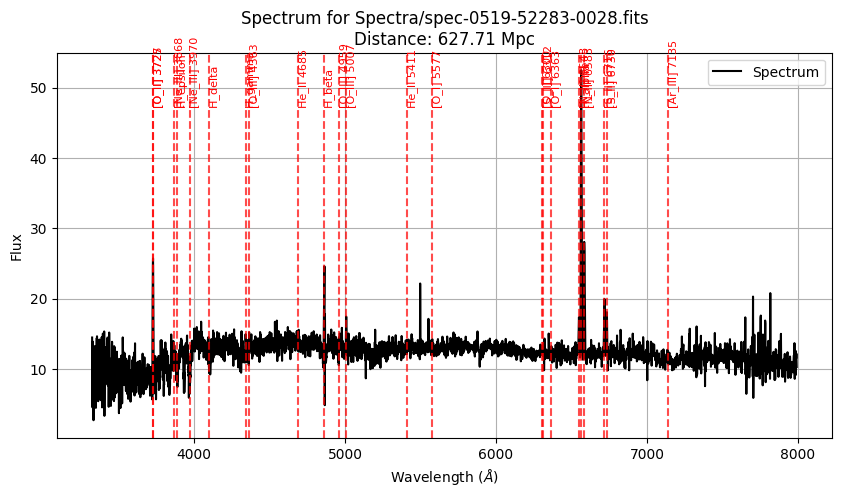


Processing file: Spectra/spec-4752-55653-0211.fits
Object ID: ['1237651735760142937']
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.5686625242233276
Estimated Distance: 2435.44 Mpc
Line: Mg_II 2799, Wavelength: 2800.32 Å, FWHM: 1103.56 Å, Velocity Width: 118143.70 km/s
Equivalent Width of Mg_II 2799: 8.00 Å
Line: [O_II] 3725, Wavelength: 3727.09 Å, FWHM: 1103.56 Å, Velocity Width: 88766.16 km/s
Equivalent Width of [O_II] 3725: 1.89 Å
Line: [O_II] 3727, Wavelength: 3729.88 Å, FWHM: 1103.56 Å, Velocity Width: 88699.91 km/s
Equivalent Width of [O_II] 3727: 3.22 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 1103.56 Å, Velocity Width: 85491.43 km/s
Equivalent Width of [Ne_III] 3868: 2.78 Å
Line: H_zeta, Wavelength: 3890.17 Å, FWHM: 671.51 Å, Velocity Width: 51749.15 km/s
Equivalent Width of H_zeta: 3.11 Å
Line: [Ne_III] 3970, Wavelength: 3968.59 Å, FWHM: 1103.56 Å, Velocity Width: 83364.47 km/s
Equivalent Width of [Ne_III] 3970: 5.85 Å
Line: H_epsilon, Wavelen

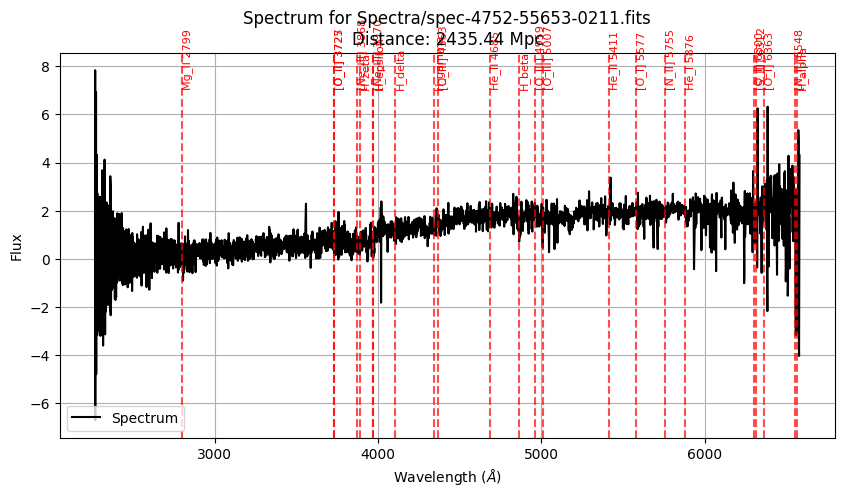


Processing file: Spectra/spec-4752-55653-0210.fits
Object ID: ['1237651735760142921']
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.5478762984275818
Estimated Distance: 2346.42 Mpc
Line: Mg_II 2799, Wavelength: 2800.32 Å, FWHM: 721.05 Å, Velocity Width: 77193.39 km/s
Equivalent Width of Mg_II 2799: 7.96 Å
Line: [O_II] 3725, Wavelength: 3727.09 Å, FWHM: 721.05 Å, Velocity Width: 57998.53 km/s
Equivalent Width of [O_II] 3725: 0.44 Å
Line: [O_II] 3727, Wavelength: 3729.88 Å, FWHM: 721.05 Å, Velocity Width: 57955.24 km/s
Equivalent Width of [O_II] 3727: 1.42 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 721.05 Å, Velocity Width: 55858.87 km/s
Equivalent Width of [Ne_III] 3868: 0.93 Å
Line: H_zeta, Wavelength: 3890.17 Å, FWHM: 549.46 Å, Velocity Width: 42343.38 km/s
Equivalent Width of H_zeta: 3.28 Å
Line: [Ne_III] 3970, Wavelength: 3968.59 Å, FWHM: 721.05 Å, Velocity Width: 54469.14 km/s
Equivalent Width of [Ne_III] 3970: 6.25 Å
Line: H_epsilon, Wavelength: 3

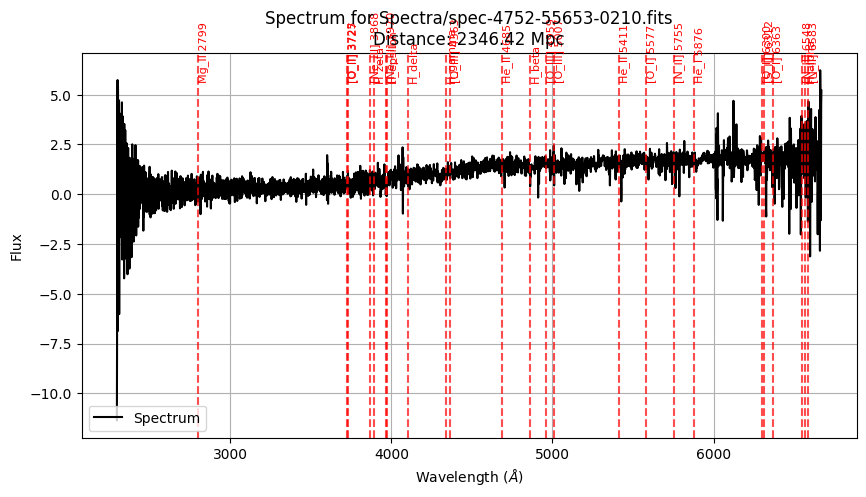


Processing file: Spectra/spec-0519-52283-0029.fits
Object ID: [[1462    1    3  413  115]]
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.07727579027414322
Estimated Distance: 330.95 Mpc
Line: [O_II] 3725  , Wavelength: 3727.09 Å, FWHM: 647.84 Å, Velocity Width: 52109.55 km/s
Equivalent Width of [O_II] 3725  : 3.83 Å
Line: [O_II] 3727  , Wavelength: 3729.88 Å, FWHM: 647.84 Å, Velocity Width: 52070.66 km/s
Equivalent Width of [O_II] 3727  : 4.17 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 647.84 Å, Velocity Width: 50187.15 km/s
Equivalent Width of [Ne_III] 3868: 4.87 Å
Line: H_epsilon    , Wavelength: 3890.15 Å, FWHM: 222.29 Å, Velocity Width: 17130.48 km/s
Equivalent Width of H_epsilon    : 5.06 Å
Line: [Ne_III] 3970, Wavelength: 3971.12 Å, FWHM: 647.84 Å, Velocity Width: 48907.34 km/s
Equivalent Width of [Ne_III] 3970: 6.63 Å
Line: H_delta      , Wavelength: 4102.89 Å, FWHM: 222.29 Å, Velocity Width: 16242.24 km/s
Equivalent Width of H_delta      : 3.45

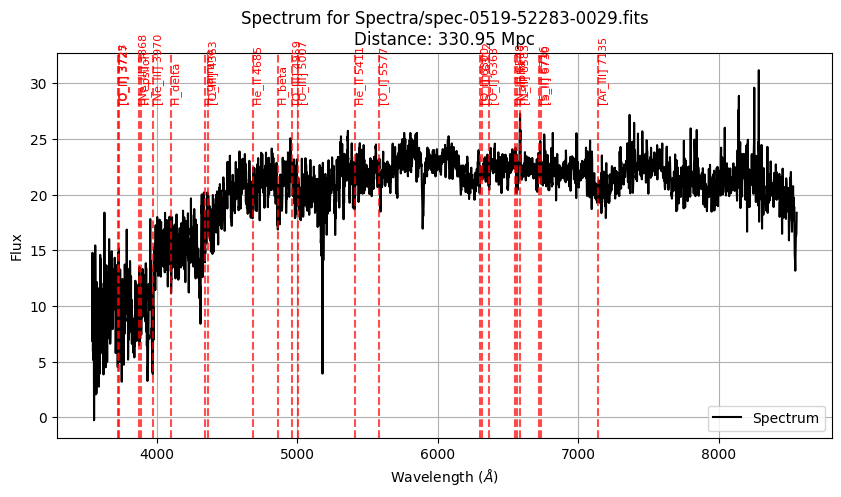


Processing file: Spectra/spec-4752-55653-0272.fits
Object ID: ['1237651735760077069']
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.36735785007476807
Estimated Distance: 1573.30 Mpc
Line: Mg_II 2799, Wavelength: 2800.32 Å, FWHM: 2546.12 Å, Velocity Width: 272579.67 km/s
Equivalent Width of Mg_II 2799: 8.07 Å
Line: [O_II] 3725, Wavelength: 3727.09 Å, FWHM: 2546.12 Å, Velocity Width: 204800.16 km/s
Equivalent Width of [O_II] 3725: 4.85 Å
Line: [O_II] 3727, Wavelength: 3729.88 Å, FWHM: 2546.12 Å, Velocity Width: 204647.32 km/s
Equivalent Width of [O_II] 3727: 4.68 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 2546.12 Å, Velocity Width: 197244.77 km/s
Equivalent Width of [Ne_III] 3868: 4.55 Å
Line: H_zeta, Wavelength: 3890.17 Å, FWHM: 737.78 Å, Velocity Width: 56856.71 km/s
Equivalent Width of H_zeta: 5.01 Å
Line: [Ne_III] 3970, Wavelength: 3968.59 Å, FWHM: 2546.12 Å, Velocity Width: 192337.46 km/s
Equivalent Width of [Ne_III] 3970: 6.17 Å
Line: H_epsilon, Wa

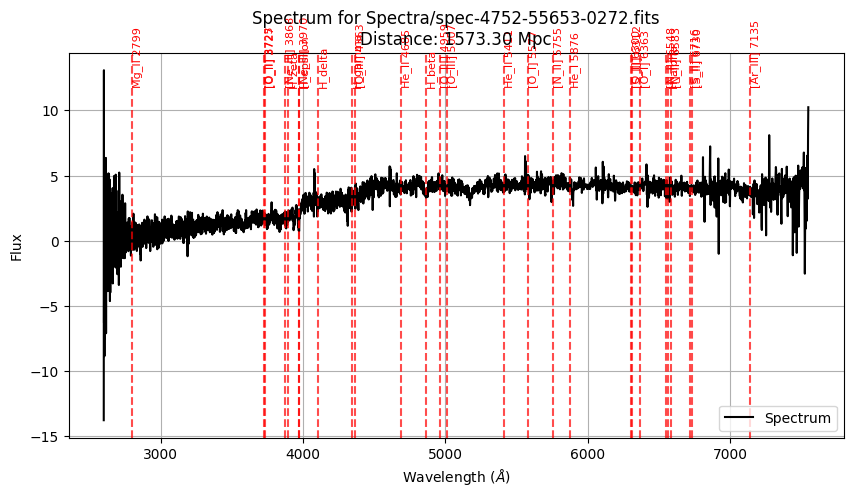


Processing file: Spectra/spec-4752-55653-0264.fits
Object ID: ['1237651735760142631']
Object type: ['QSO'] and subtype: ['BROADLINE']
Redshift of the spectrum: 2.316202402114868
Estimated Distance: 9919.71 Mpc
Line: Ly_alpha, Wavelength: 1215.67 Å, FWHM: 7872.61 Å, Velocity Width: 1941437.96 km/s
Equivalent Width of Ly_alpha: -2.66 Å
Line: N_V 1240, Wavelength: 1240.81 Å, FWHM: 3787.91 Å, Velocity Width: 915198.11 km/s
Equivalent Width of N_V 1240: -7.94 Å
Line: C_IV 1549, Wavelength: 1549.48 Å, FWHM: 3047.17 Å, Velocity Width: 589564.22 km/s
Equivalent Width of C_IV 1549: -2.16 Å
Line: He_II 1640, Wavelength: 1640.42 Å, FWHM: 3047.17 Å, Velocity Width: 556880.54 km/s
Equivalent Width of He_II 1640: -0.87 Å
Line: C_III] 1908, Wavelength: 1908.73 Å, FWHM: 3047.17 Å, Velocity Width: 478598.89 km/s
Equivalent Width of C_III] 1908: -1.62 Å
Line: Mg_II 2799, Wavelength: 2800.32 Å, FWHM: 3047.17 Å, Velocity Width: 326219.70 km/s
Equivalent Width of Mg_II 2799: 2.49 Å


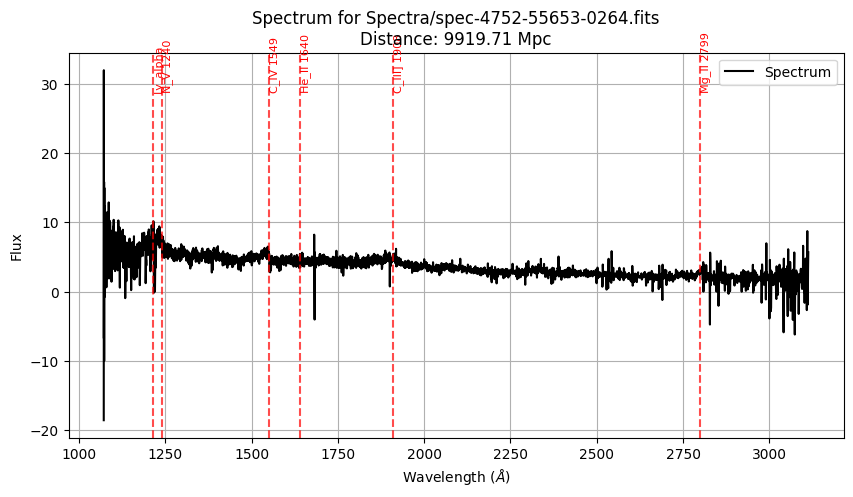


Processing file: Spectra/spec-0519-52283-0030.fits
Object ID: [[1462    1    3  413   63]]
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.09001822769641876
Estimated Distance: 385.53 Mpc
Line: [O_II] 3725  , Wavelength: 3727.09 Å, FWHM: 766.43 Å, Velocity Width: 61648.88 km/s
Equivalent Width of [O_II] 3725  : 4.42 Å
Line: [O_II] 3727  , Wavelength: 3729.88 Å, FWHM: 766.43 Å, Velocity Width: 61602.87 km/s
Equivalent Width of [O_II] 3727  : 5.48 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 766.43 Å, Velocity Width: 59374.56 km/s
Equivalent Width of [Ne_III] 3868: 5.17 Å
Line: H_epsilon    , Wavelength: 3890.15 Å, FWHM: 392.06 Å, Velocity Width: 30213.56 km/s
Equivalent Width of H_epsilon    : 5.13 Å
Line: [Ne_III] 3970, Wavelength: 3971.12 Å, FWHM: 766.43 Å, Velocity Width: 57860.46 km/s
Equivalent Width of [Ne_III] 3970: 6.23 Å
Line: H_delta      , Wavelength: 4102.89 Å, FWHM: 392.06 Å, Velocity Width: 28646.95 km/s
Equivalent Width of H_delta      : 3.69

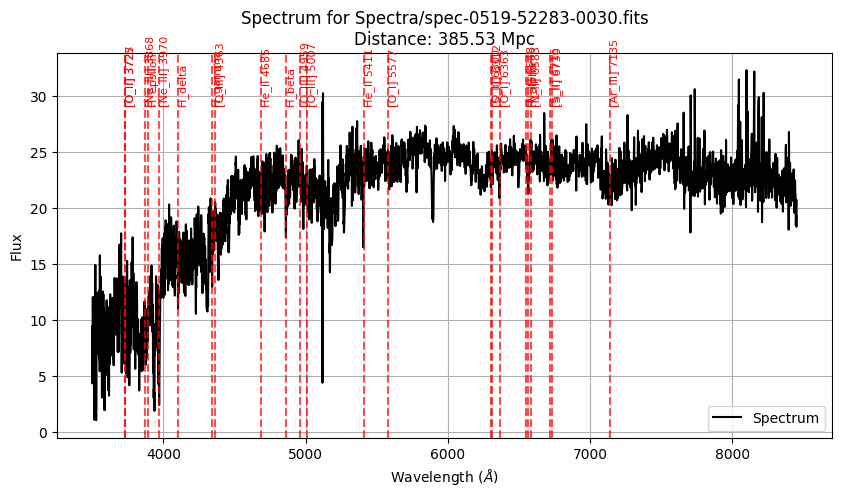


Processing file: Spectra/spec-4752-55653-0268.fits
Object ID: ['1237651735760077074']
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.319892942905426
Estimated Distance: 1370.02 Mpc
Line: Mg_II 2799, Wavelength: 2800.32 Å, FWHM: 996.61 Å, Velocity Width: 106694.17 km/s
Equivalent Width of Mg_II 2799: 10.59 Å
Line: [O_II] 3725, Wavelength: 3727.09 Å, FWHM: 996.61 Å, Velocity Width: 80163.66 km/s
Equivalent Width of [O_II] 3725: 4.71 Å
Line: [O_II] 3727, Wavelength: 3729.88 Å, FWHM: 996.61 Å, Velocity Width: 80103.83 km/s
Equivalent Width of [O_II] 3727: 5.37 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 996.61 Å, Velocity Width: 77206.30 km/s
Equivalent Width of [Ne_III] 3868: 5.57 Å
Line: H_zeta, Wavelength: 3890.17 Å, FWHM: 611.07 Å, Velocity Width: 47091.77 km/s
Equivalent Width of H_zeta: 5.35 Å
Line: [Ne_III] 3970, Wavelength: 3968.59 Å, FWHM: 996.61 Å, Velocity Width: 75285.46 km/s
Equivalent Width of [Ne_III] 3970: 6.44 Å
Line: H_epsilon, Wavelength: 

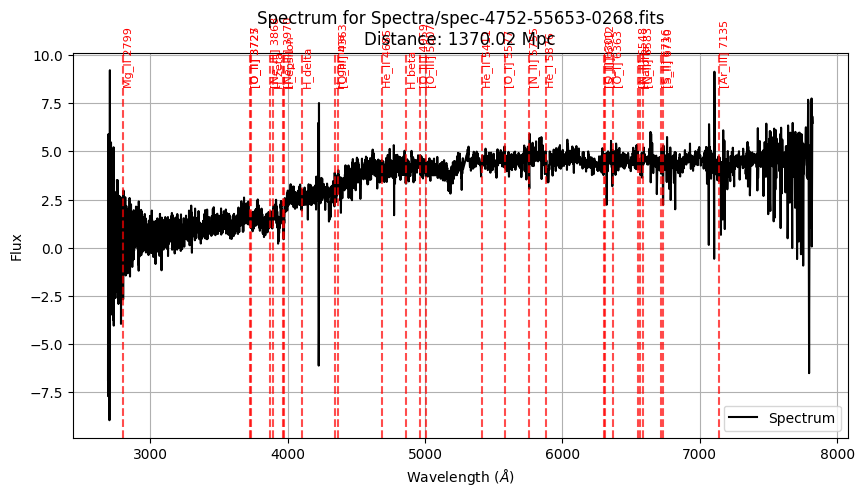


Processing file: Spectra/spec-4752-55653-0213.fits
Object ID: ['1237651735760143046']
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.545606791973114
Estimated Distance: 2336.70 Mpc
Line: Mg_II 2799, Wavelength: 2800.32 Å, FWHM: 578.72 Å, Velocity Width: 61956.37 km/s
Equivalent Width of Mg_II 2799: 7.42 Å
Line: [O_II] 3725, Wavelength: 3727.09 Å, FWHM: 578.72 Å, Velocity Width: 46550.33 km/s
Equivalent Width of [O_II] 3725: 0.96 Å
Line: [O_II] 3727, Wavelength: 3729.88 Å, FWHM: 578.72 Å, Velocity Width: 46515.59 km/s
Equivalent Width of [O_II] 3727: -0.40 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 578.72 Å, Velocity Width: 44833.02 km/s
Equivalent Width of [Ne_III] 3868: 0.94 Å
Line: H_zeta, Wavelength: 3890.17 Å, FWHM: 736.61 Å, Velocity Width: 56766.23 km/s
Equivalent Width of H_zeta: 2.02 Å
Line: [Ne_III] 3970, Wavelength: 3968.59 Å, FWHM: 578.72 Å, Velocity Width: 43717.61 km/s
Equivalent Width of [Ne_III] 3970: 5.61 Å
Line: H_epsilon, Wavelength: 3

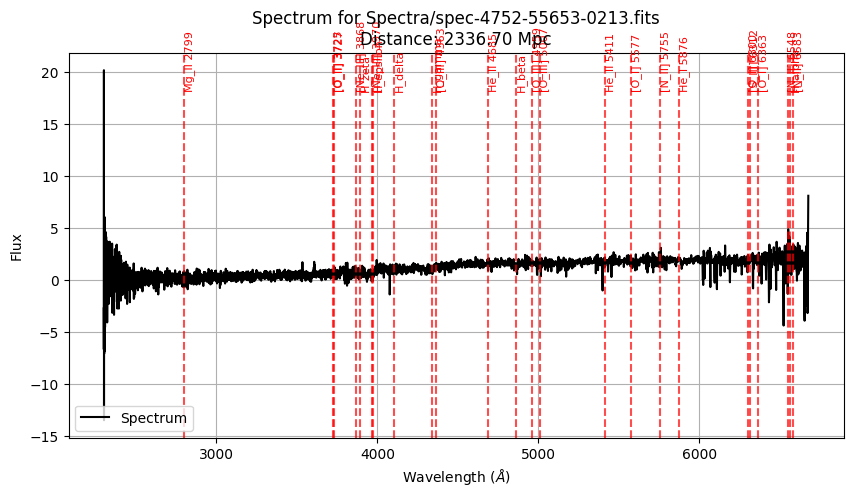


Processing file: Spectra/spec-0520-52288-0280.fits
Object ID: [[1458    2    2  418  129]]
Object type: ['STAR'] and subtype: ['K7']
Redshift of the spectrum: -0.0001933855382958427
Estimated Distance: -0.83 Mpc
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 250.94 Å, Velocity Width: 19440.04 km/s
Equivalent Width of [Ne_III] 3868: 6.25 Å
Line: H_epsilon    , Wavelength: 3890.15 Å, FWHM: 1037.69 Å, Velocity Width: 79968.81 km/s
Equivalent Width of H_epsilon    : 7.64 Å
Line: [Ne_III] 3970, Wavelength: 3971.12 Å, FWHM: 250.94 Å, Velocity Width: 18944.30 km/s
Equivalent Width of [Ne_III] 3970: 7.88 Å
Line: H_delta      , Wavelength: 4102.89 Å, FWHM: 1037.69 Å, Velocity Width: 75822.31 km/s
Equivalent Width of H_delta      : 7.17 Å
Line: H_gamma      , Wavelength: 4341.68 Å, FWHM: 250.94 Å, Velocity Width: 17327.41 km/s
Equivalent Width of H_gamma      : 5.02 Å
Line: [O_III] 4363 , Wavelength: 4364.44 Å, FWHM: 250.94 Å, Velocity Width: 17237.09 km/s
Equivalent Width of [O_III] 4363 : 

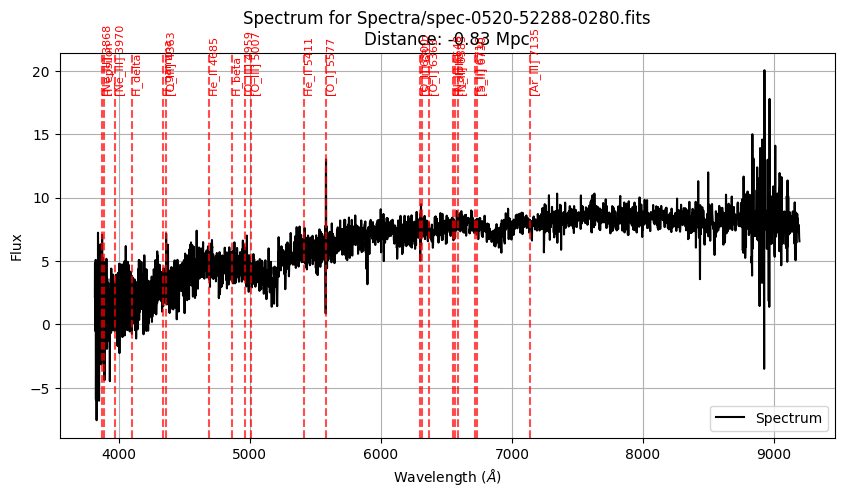


Processing file: Spectra/spec-4752-55653-0212.fits
Object ID: ['1237651735760208336']
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.3216213881969452
Estimated Distance: 1377.42 Mpc
Line: Mg_II 2799, Wavelength: 2800.32 Å, FWHM: 582.07 Å, Velocity Width: 62314.65 km/s
Equivalent Width of Mg_II 2799: 9.86 Å
Line: [O_II] 3725, Wavelength: 3727.09 Å, FWHM: 582.07 Å, Velocity Width: 46819.52 km/s
Equivalent Width of [O_II] 3725: 1.23 Å
Line: [O_II] 3727, Wavelength: 3729.88 Å, FWHM: 582.07 Å, Velocity Width: 46784.58 km/s
Equivalent Width of [O_II] 3727: 0.99 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 582.07 Å, Velocity Width: 45092.28 km/s
Equivalent Width of [Ne_III] 3868: 5.22 Å
Line: H_zeta, Wavelength: 3890.17 Å, FWHM: 734.73 Å, Velocity Width: 56621.18 km/s
Equivalent Width of H_zeta: 5.17 Å
Line: [Ne_III] 3970, Wavelength: 3968.59 Å, FWHM: 582.07 Å, Velocity Width: 43970.41 km/s
Equivalent Width of [Ne_III] 3970: 6.52 Å
Line: H_epsilon, Wavelength: 3

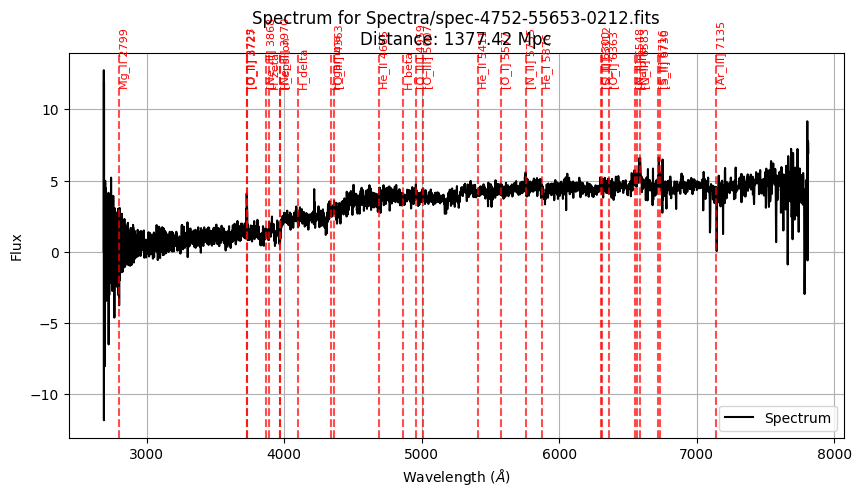


Processing file: Spectra/spec-0520-52288-0278.fits
Object ID: [[1458    2    2  417    7]]
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.5470483899116516
Estimated Distance: 2342.87 Mpc
Line: Mg_II 2799   , Wavelength: 2800.32 Å, FWHM: 268.64 Å, Velocity Width: 28759.33 km/s
Equivalent Width of Mg_II 2799   : 6.67 Å
Line: [O_II] 3725  , Wavelength: 3727.09 Å, FWHM: 268.64 Å, Velocity Width: 21608.05 km/s
Equivalent Width of [O_II] 3725  : 2.99 Å
Line: [O_II] 3727  , Wavelength: 3729.88 Å, FWHM: 268.64 Å, Velocity Width: 21591.92 km/s
Equivalent Width of [O_II] 3727  : 3.00 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 268.64 Å, Velocity Width: 20810.89 km/s
Equivalent Width of [Ne_III] 3868: 1.81 Å
Line: H_epsilon    , Wavelength: 3890.15 Å, FWHM: 234.55 Å, Velocity Width: 18075.54 km/s
Equivalent Width of H_epsilon    : 2.77 Å
Line: [Ne_III] 3970, Wavelength: 3971.12 Å, FWHM: 268.64 Å, Velocity Width: 20280.20 km/s
Equivalent Width of [Ne_III] 3970: 2.11

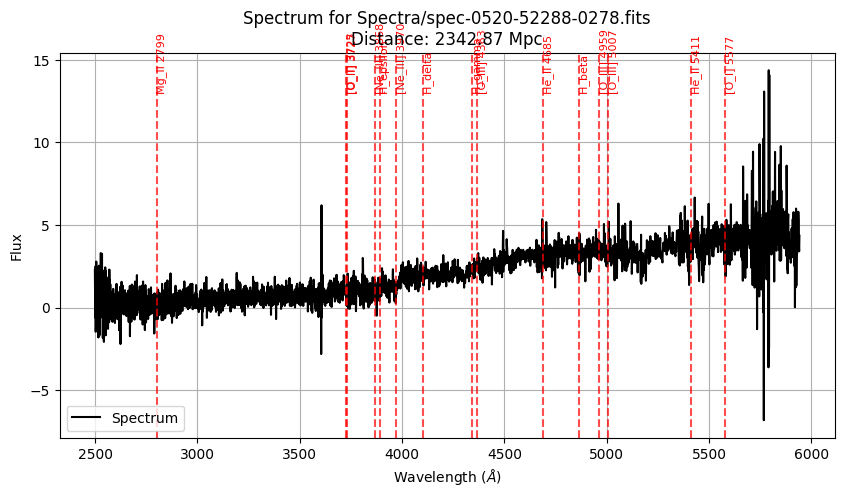


Processing file: Spectra/spec-0520-52288-0274.fits
Object ID: [[1458    2    2  416  168]]
Object type: ['GALAXY'] and subtype: ['STARBURST']
Redshift of the spectrum: 0.15898917615413666
Estimated Distance: 680.91 Mpc
Line: [O_II] 3725  , Wavelength: 3727.09 Å, FWHM: 380.17 Å, Velocity Width: 30579.27 km/s
Equivalent Width of [O_II] 3725  : -21.73 Å
Line: [O_II] 3727  , Wavelength: 3729.88 Å, FWHM: 380.17 Å, Velocity Width: 30556.44 km/s
Equivalent Width of [O_II] 3727  : -20.68 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 380.17 Å, Velocity Width: 29451.15 km/s
Equivalent Width of [Ne_III] 3868: -0.98 Å
Line: H_epsilon    , Wavelength: 3890.15 Å, FWHM: 350.48 Å, Velocity Width: 27009.78 km/s
Equivalent Width of H_epsilon    : 0.68 Å
Line: [Ne_III] 3970, Wavelength: 3971.12 Å, FWHM: 380.17 Å, Velocity Width: 28700.12 km/s
Equivalent Width of [Ne_III] 3970: 1.54 Å
Line: H_delta      , Wavelength: 4102.89 Å, FWHM: 350.48 Å, Velocity Width: 25609.29 km/s
Equivalent Width of H_del

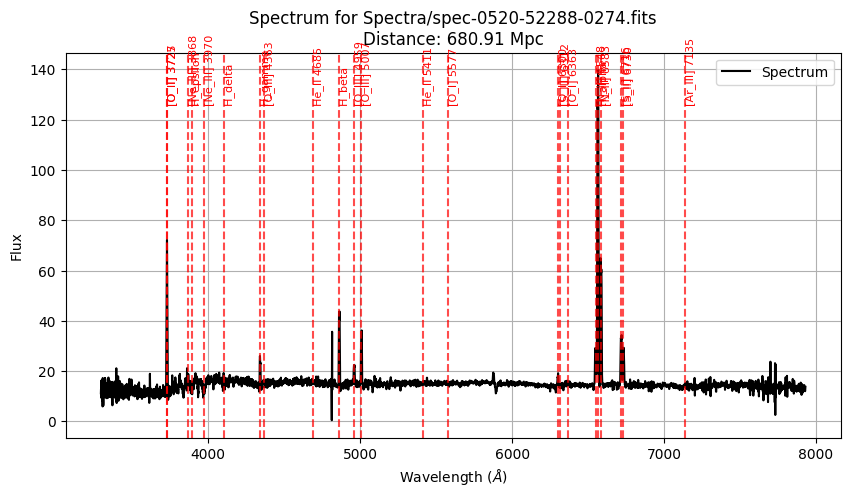


Processing file: Spectra/spec-4752-55653-0215.fits
Object ID: ['1237651735760208269']
Object type: ['GALAXY'] and subtype: ['STARBURST']
Redshift of the spectrum: 0.19736383855342865
Estimated Distance: 845.26 Mpc
Line: [O_II] 3725, Wavelength: 3727.09 Å, FWHM: 305.01 Å, Velocity Width: 24533.82 km/s
Equivalent Width of [O_II] 3725: -3.15 Å
Line: [O_II] 3727, Wavelength: 3729.88 Å, FWHM: 305.01 Å, Velocity Width: 24515.51 km/s
Equivalent Width of [O_II] 3727: -3.25 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 305.01 Å, Velocity Width: 23628.73 km/s
Equivalent Width of [Ne_III] 3868: 3.18 Å
Line: H_zeta, Wavelength: 3890.17 Å, FWHM: 294.35 Å, Velocity Width: 22683.49 km/s
Equivalent Width of H_zeta: 5.28 Å
Line: [Ne_III] 3970, Wavelength: 3968.59 Å, FWHM: 305.01 Å, Velocity Width: 23040.86 km/s
Equivalent Width of [Ne_III] 3970: 4.35 Å
Line: H_epsilon, Wavelength: 3971.20 Å, FWHM: 294.35 Å, Velocity Width: 22220.64 km/s
Equivalent Width of H_epsilon: 4.41 Å
Line: H_delta, Wavele

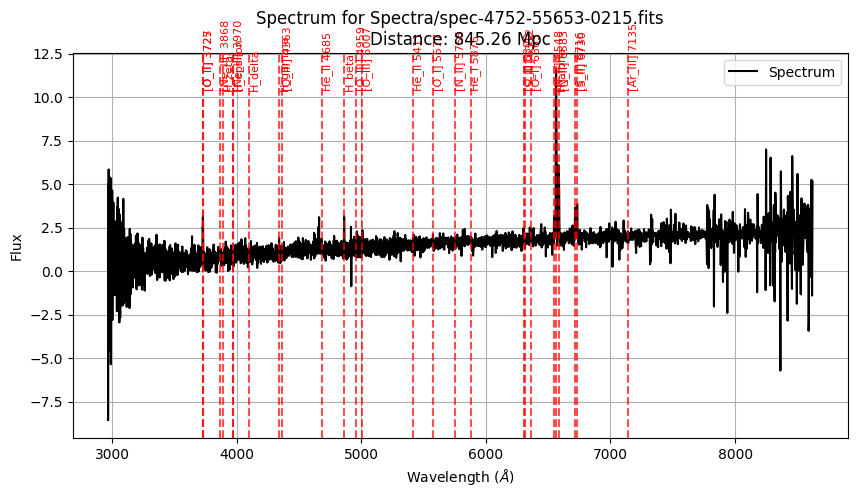


Processing file: Spectra/spec-0520-52288-0269.fits
Object ID: [[1458    2    2  417  145]]
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.15829028189182281
Estimated Distance: 677.92 Mpc
Line: [O_II] 3725  , Wavelength: 3727.09 Å, FWHM: 902.60 Å, Velocity Width: 72601.27 km/s
Equivalent Width of [O_II] 3725  : 5.28 Å
Line: [O_II] 3727  , Wavelength: 3729.88 Å, FWHM: 902.60 Å, Velocity Width: 72547.08 km/s
Equivalent Width of [O_II] 3727  : 5.20 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 902.60 Å, Velocity Width: 69922.89 km/s
Equivalent Width of [Ne_III] 3868: 5.51 Å
Line: H_epsilon    , Wavelength: 3890.15 Å, FWHM: 704.86 Å, Velocity Width: 54319.49 km/s
Equivalent Width of H_epsilon    : 5.51 Å
Line: [Ne_III] 3970, Wavelength: 3971.12 Å, FWHM: 902.60 Å, Velocity Width: 68139.81 km/s
Equivalent Width of [Ne_III] 3970: 6.92 Å
Line: H_delta      , Wavelength: 4102.89 Å, FWHM: 704.86 Å, Velocity Width: 51502.95 km/s
Equivalent Width of H_delta      : 3.58

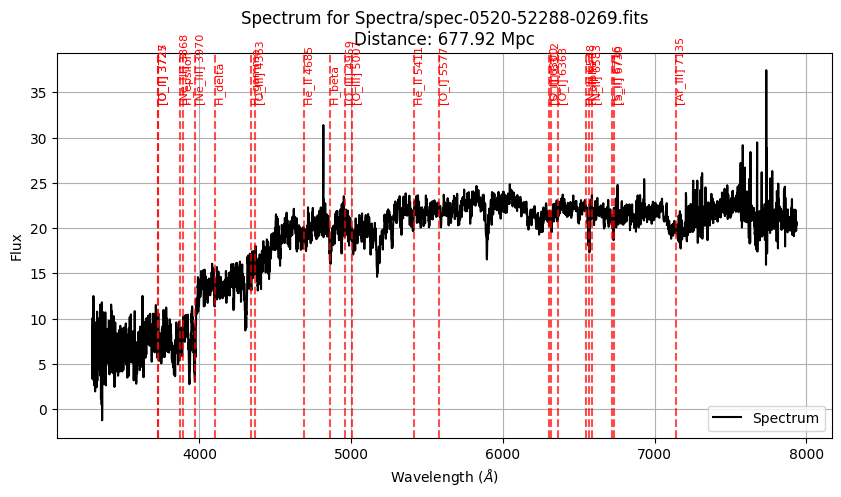


Processing file: Spectra/spec-4752-55653-0274.fits
Object ID: ['1237651753476620729']
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.5906016826629639
Estimated Distance: 2529.40 Mpc
Line: Mg_II 2799, Wavelength: 2800.32 Å, FWHM: 239.13 Å, Velocity Width: 25600.98 km/s
Equivalent Width of Mg_II 2799: 9.25 Å
Line: [O_II] 3725, Wavelength: 3727.09 Å, FWHM: 239.13 Å, Velocity Width: 19235.06 km/s
Equivalent Width of [O_II] 3725: -3.38 Å
Line: [O_II] 3727, Wavelength: 3729.88 Å, FWHM: 239.13 Å, Velocity Width: 19220.70 km/s
Equivalent Width of [O_II] 3727: -2.24 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 239.13 Å, Velocity Width: 18525.45 km/s
Equivalent Width of [Ne_III] 3868: 2.03 Å
Line: H_zeta, Wavelength: 3890.17 Å, FWHM: 797.21 Å, Velocity Width: 61436.12 km/s
Equivalent Width of H_zeta: 0.14 Å
Line: [Ne_III] 3970, Wavelength: 3968.59 Å, FWHM: 239.13 Å, Velocity Width: 18064.55 km/s
Equivalent Width of [Ne_III] 3970: 4.82 Å
Line: H_epsilon, Wavelength:

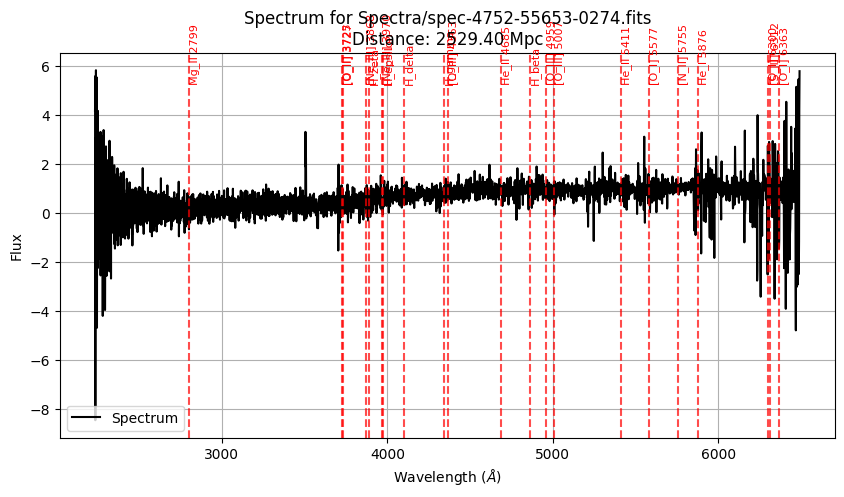


Processing file: Spectra/spec-4752-55653-0262.fits
Object ID: ['1237651735760142641']
Object type: ['QSO'] and subtype: ['BROADLINE']
Redshift of the spectrum: 2.320011854171753
Estimated Distance: 9936.03 Mpc
Line: Ly_alpha, Wavelength: 1215.67 Å, FWHM: 3933.39 Å, Velocity Width: 970001.26 km/s
Equivalent Width of Ly_alpha: -36.49 Å
Line: N_V 1240, Wavelength: 1240.81 Å, FWHM: 7334.97 Å, Velocity Width: 1772205.19 km/s
Equivalent Width of N_V 1240: -15.89 Å
Line: C_IV 1549, Wavelength: 1549.48 Å, FWHM: 4899.43 Å, Velocity Width: 947938.80 km/s
Equivalent Width of C_IV 1549: -14.81 Å
Line: He_II 1640, Wavelength: 1640.42 Å, FWHM: 4899.43 Å, Velocity Width: 895387.90 km/s
Equivalent Width of He_II 1640: -1.27 Å
Line: C_III] 1908, Wavelength: 1908.73 Å, FWHM: 4899.43 Å, Velocity Width: 769521.69 km/s
Equivalent Width of C_III] 1908: -3.38 Å
Line: Mg_II 2799, Wavelength: 2800.32 Å, FWHM: 4899.43 Å, Velocity Width: 524516.75 km/s
Equivalent Width of Mg_II 2799: 2.01 Å


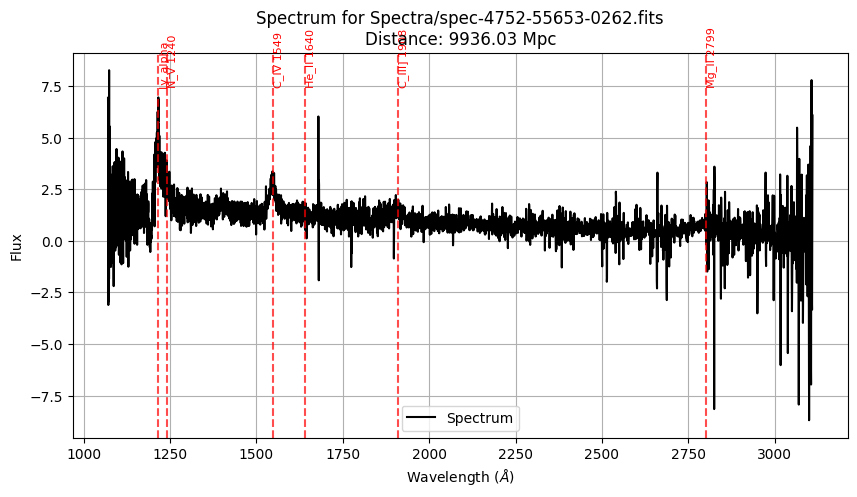


Processing file: Spectra/spec-4752-55653-0219.fits
Object ID: ['1237651753476686249']
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.44434887170791626
Estimated Distance: 1903.03 Mpc
Line: Mg_II 2799, Wavelength: 2800.32 Å, FWHM: 590.57 Å, Velocity Width: 63224.27 km/s
Equivalent Width of Mg_II 2799: 6.93 Å
Line: [O_II] 3725, Wavelength: 3727.09 Å, FWHM: 590.57 Å, Velocity Width: 47502.96 km/s
Equivalent Width of [O_II] 3725: 2.80 Å
Line: [O_II] 3727, Wavelength: 3729.88 Å, FWHM: 590.57 Å, Velocity Width: 47467.51 km/s
Equivalent Width of [O_II] 3727: 3.01 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 590.57 Å, Velocity Width: 45750.50 km/s
Equivalent Width of [Ne_III] 3868: 4.10 Å
Line: H_zeta, Wavelength: 3890.17 Å, FWHM: 142.45 Å, Velocity Width: 10977.64 km/s
Equivalent Width of H_zeta: 4.37 Å
Line: [Ne_III] 3970, Wavelength: 3968.59 Å, FWHM: 590.57 Å, Velocity Width: 44612.26 km/s
Equivalent Width of [Ne_III] 3970: 4.82 Å
Line: H_epsilon, Wavelength: 

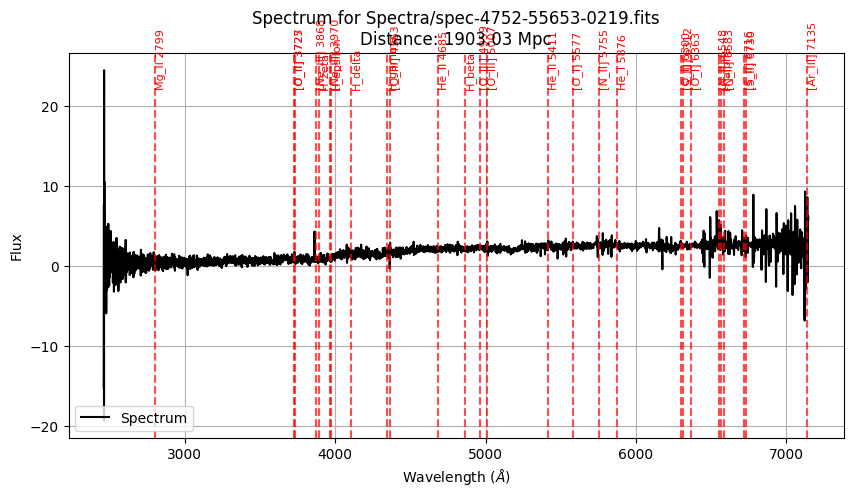


Processing file: Spectra/spec-0520-52288-0264.fits
Object ID: [[1458    2    2  418  165]]
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.32181787490844727
Estimated Distance: 1378.27 Mpc
Line: [O_II] 3725  , Wavelength: 3727.09 Å, FWHM: 1155.19 Å, Velocity Width: 92918.83 km/s
Equivalent Width of [O_II] 3725  : 4.95 Å
Line: [O_II] 3727  , Wavelength: 3729.88 Å, FWHM: 1155.19 Å, Velocity Width: 92849.48 km/s
Equivalent Width of [O_II] 3727  : 5.02 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 1155.19 Å, Velocity Width: 89490.91 km/s
Equivalent Width of [Ne_III] 3868: 6.27 Å
Line: H_epsilon    , Wavelength: 3890.15 Å, FWHM: 939.29 Å, Velocity Width: 72385.58 km/s
Equivalent Width of H_epsilon    : 5.56 Å
Line: [Ne_III] 3970, Wavelength: 3971.12 Å, FWHM: 1155.19 Å, Velocity Width: 87208.83 km/s
Equivalent Width of [Ne_III] 3970: 6.75 Å
Line: H_delta      , Wavelength: 4102.89 Å, FWHM: 939.29 Å, Velocity Width: 68632.29 km/s
Equivalent Width of H_delta      :

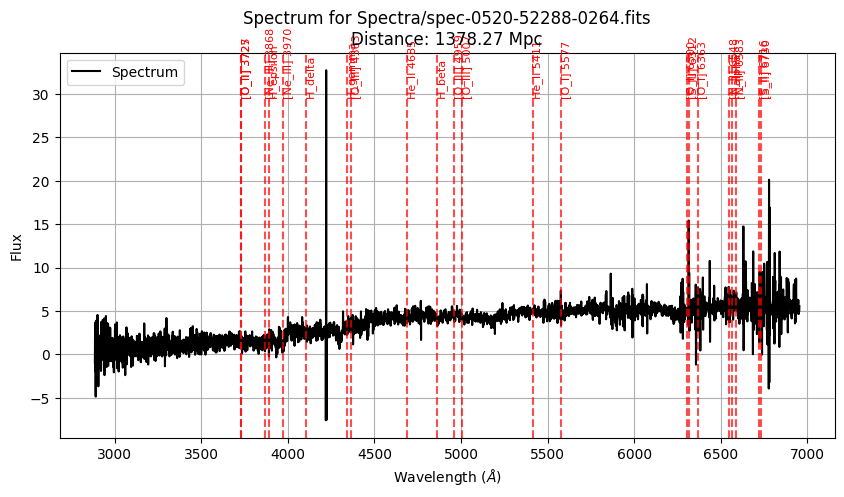


Processing file: Spectra/spec-4752-55653-0218.fits
Object ID: ['1237651753476686282']
Object type: ['QSO'] and subtype: ['']
Redshift of the spectrum: 2.085556745529175
Estimated Distance: 8931.92 Mpc
Line: Ly_alpha, Wavelength: 1215.67 Å, FWHM: 6472.03 Å, Velocity Width: 1596047.24 km/s
Equivalent Width of Ly_alpha: -39.03 Å
Line: N_V 1240, Wavelength: 1240.81 Å, FWHM: 21140.14 Å, Velocity Width: 5107674.46 km/s
Equivalent Width of N_V 1240: -13.10 Å
Line: C_IV 1549, Wavelength: 1549.48 Å, FWHM: 7737.11 Å, Velocity Width: 1496971.27 km/s
Equivalent Width of C_IV 1549: -18.66 Å
Line: He_II 1640, Wavelength: 1640.42 Å, FWHM: 7737.11 Å, Velocity Width: 1413983.64 km/s
Equivalent Width of He_II 1640: -2.04 Å
Line: C_III] 1908, Wavelength: 1908.73 Å, FWHM: 7737.11 Å, Velocity Width: 1215217.54 km/s
Equivalent Width of C_III] 1908: -0.82 Å
Line: Mg_II 2799, Wavelength: 2800.32 Å, FWHM: 7737.11 Å, Velocity Width: 828309.27 km/s
Equivalent Width of Mg_II 2799: 2.20 Å


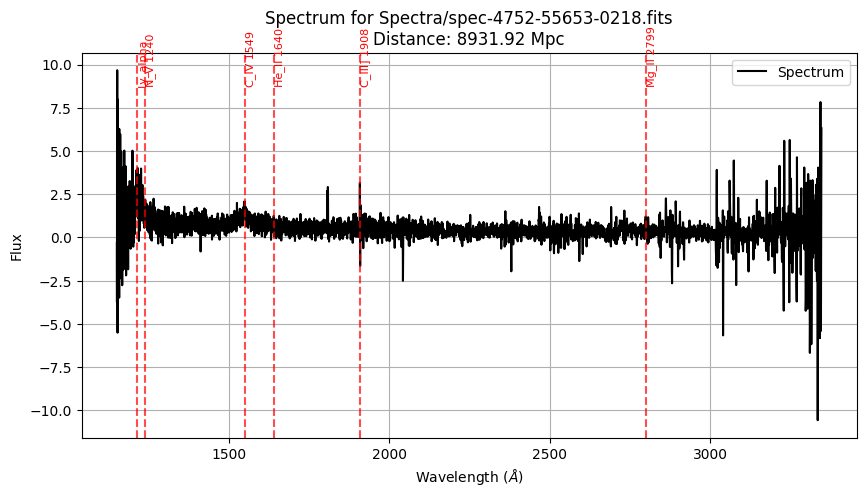


Processing file: Spectra/spec-0519-52283-0021.fits
Object ID: [[1458    2    2  418   91]]
Object type: ['QSO'] and subtype: ['BROADLINE']
Redshift of the spectrum: 1.9200873374938965
Estimated Distance: 8223.25 Mpc
Line: C_IV 1549    , Wavelength: 1549.48 Å, FWHM: 4246.39 Å, Velocity Width: 821588.91 km/s
Equivalent Width of C_IV 1549    : -31.60 Å
Line: He_II 1640   , Wavelength: 1640.42 Å, FWHM: 4246.39 Å, Velocity Width: 776042.47 km/s
Equivalent Width of He_II 1640   : -7.49 Å
Line: C_III] 1908  , Wavelength: 1908.73 Å, FWHM: 4246.39 Å, Velocity Width: 666952.85 km/s
Equivalent Width of C_III] 1908  : -5.22 Å
Line: Mg_II 2799   , Wavelength: 2800.32 Å, FWHM: 4246.39 Å, Velocity Width: 454604.40 km/s
Equivalent Width of Mg_II 2799   : -0.26 Å


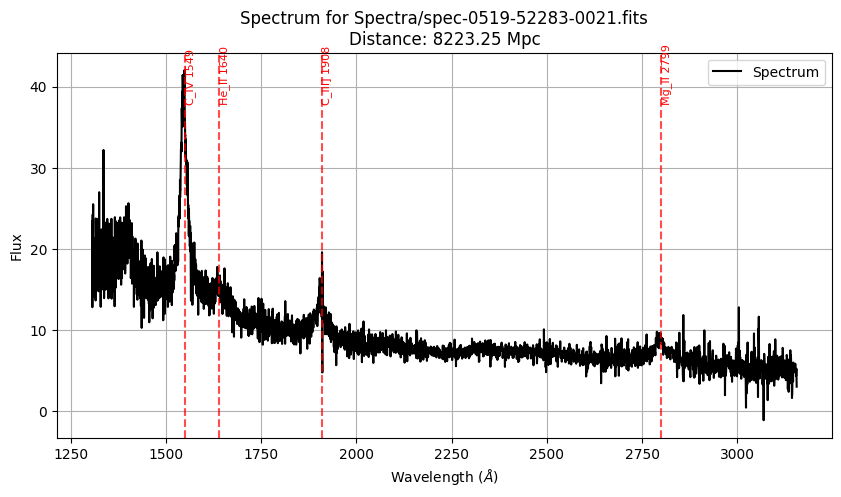


Processing file: Spectra/spec-4752-55653-0280.fits
Object ID: ['1237651735760142725']
Object type: ['GALAXY'] and subtype: ['']
Redshift of the spectrum: 0.5323154926300049
Estimated Distance: 2279.77 Mpc
Line: Mg_II 2799, Wavelength: 2800.32 Å, FWHM: 98.50 Å, Velocity Width: 10545.12 km/s
Equivalent Width of Mg_II 2799: 12.27 Å
Line: [O_II] 3725, Wavelength: 3727.09 Å, FWHM: 98.50 Å, Velocity Width: 7922.97 km/s
Equivalent Width of [O_II] 3725: 1.83 Å
Line: [O_II] 3727, Wavelength: 3729.88 Å, FWHM: 98.50 Å, Velocity Width: 7917.06 km/s
Equivalent Width of [O_II] 3727: 2.33 Å
Line: [Ne_III] 3868, Wavelength: 3869.86 Å, FWHM: 98.50 Å, Velocity Width: 7630.68 km/s
Equivalent Width of [Ne_III] 3868: 2.71 Å
Line: H_zeta, Wavelength: 3890.17 Å, FWHM: 453.21 Å, Velocity Width: 34926.50 km/s
Equivalent Width of H_zeta: 4.05 Å
Line: [Ne_III] 3970, Wavelength: 3968.59 Å, FWHM: 98.50 Å, Velocity Width: 7440.84 km/s
Equivalent Width of [Ne_III] 3970: 4.91 Å
Line: H_epsilon, Wavelength: 3971.20 Å

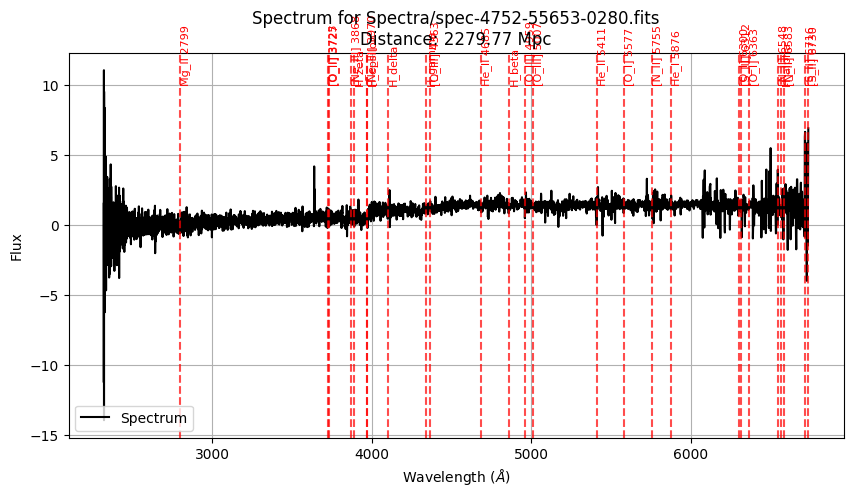

In [2]:
"""
    Repeat above procedure for all spectra
    1. Extract obj ID
    2. Extract obj type and subtype
    3. Extract redshift
    4. Extract wavelength and flux
    5. Wavelength calibrate the spectrum
    6. Extract spectral lines
    7. Plot spectrum with spectral lines
"""
# Constants
c = 299792.458  # Speed of light in km/s
H0 = 70  # Hubble constant in km/s/Mpc

# Get all FITS files in the Spectra directory
fits_files = glob.glob('Spectra/*.fits')

for file in fits_files:
    print(f"\nProcessing file: {file}")

    hdu = fits.open(file)
    data = hdu[1].data

    # Extract object ID
    obj_id = hdu[2].data['objid']
    print(f"Object ID: {obj_id}")

    # Extract the object class and subclass
    obj_type = hdu[2].data['class']
    obj_subtype = hdu[2].data['subclass']
    print(f"Object type: {obj_type} and subtype: {obj_subtype}")

    # Extract the redshift z
    z = hdu[2].data['z']
    z = z[0]
    print(f"Redshift of the spectrum: {z}")

    # Calculate distance using Hubble's Law
    distance = (c * z) / H0  # Distance in Mpc
    print(f"Estimated Distance: {distance:.2f} Mpc")

    # Extract the flux and wavelength for plotting
    SpectrumTab = Table(data)
    wavelength = np.array(10**SpectrumTab['loglam'])  # Convert from log to linear
    flux = np.array(SpectrumTab['flux'])

    # Wavelength calibration (shifting observed spectrum to rest-frame)
    wavelength = wavelength / (1 + z)

    # Extract spectral lines (rest-frame values)
    SpecLinesTab = Table(hdu[3].data)
    line_names = SpecLinesTab['LINENAME']
    line_wavelengths = np.array(SpecLinesTab['LINEWAVE'])  # Keep as rest-frame values
    line_sigmas = np.array(SpecLinesTab['LINESIGMA'])  # Gaussian sigma width

    # Define min and max wavelengths of the calibrated spectrum
    min_wave, max_wave = wavelength.min(), wavelength.max()

    # Loop through spectral lines and apply conditions
    for wave, sigma, name in zip(line_wavelengths, line_sigmas, line_names):
        if np.isnan(wave) or np.isnan(sigma):
            continue  # Skip NaN values

        fwhm = 2.355 * sigma  # Convert sigma to FWHM
        velocity_width = (fwhm / wave) * c  # Doppler velocity width

        # Filter: Only select lines within the spectral range and with positive width values
        if min_wave <= wave <= max_wave and fwhm > 0 and velocity_width > 0:
            print(f"Line: {name}, Wavelength: {wave:.2f} Å, FWHM: {fwhm:.2f} Å, Velocity Width: {velocity_width:.2f} km/s")

            # Equivalent Width Calculation using `numpy.trapezoid()`
            window = (wavelength > wave - 5) & (wavelength < wave + 5)  # Select small region around the spectral line
            if np.any(window):
                flux_cont = np.median(flux[~window])  # Estimate continuum from outside the window
                EW = np.trapezoid((1 - flux[window] / flux_cont), wavelength[window])  # Fixed function
                print(f"Equivalent Width of {name}: {EW:.2f} Å")

    # Plot the spectrum
    plt.figure(figsize=(10, 5))
    plt.plot(wavelength, flux, 'k-', label='Spectrum')

    # Mark spectral lines that passed the filters
    for wave, name in zip(line_wavelengths, line_names):
        if min_wave <= wave <= max_wave:  # Ensure it falls within range
            plt.axvline(x=wave, color='red', linestyle='--', alpha=0.7)
            plt.text(wave, max(flux) * 0.9, str(name), rotation=90, verticalalignment='bottom', fontsize=8, color='red')

    plt.xlabel(r'Wavelength ($\AA$)')
    plt.ylabel('Flux')
    plt.title(f'Spectrum for {file}\nDistance: {distance:.2f} Mpc')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
"""
    Check if the Spectral Features listed in the FITS files are in rest frame or observed frame
"""


# Common rest-frame spectral lines for comparison
known_lines_rest = np.array([6562.8, 5007.0, 4861.0, 6583.0])  # H-alpha, O III, H-beta, N II

# Get all FITS files in the Spectra directory
fits_files = glob.glob('Spectra/*.fits')

for file in fits_files:
    print(f"\nChecking file: {file}")

    hdu = fits.open(file)

    # Extract redshift
    z = hdu[2].data['z'][0]  # Assuming single object per file

    # Extract spectral line wavelengths
    line_wavelengths = np.array(hdu[3].data['LINEWAVE'])

    # Compute expected observed-frame values for known rest-frame lines
    known_lines_observed = known_lines_rest * (1 + z)

    # Compute mean difference to observed and rest-frame values
    mean_diff_rest = np.mean(np.abs(line_wavelengths - known_lines_rest[:, None]), axis=0)
    mean_diff_observed = np.mean(np.abs(line_wavelengths - known_lines_observed[:, None]), axis=0)

    # Determine if the values are closer to rest-frame or observed-frame
    if np.mean(mean_diff_observed) < np.mean(mean_diff_rest):
        print("→ LINEWAVE appears to be in **observed frame** (redshifted). Convert to rest-frame before use.")
    else:
        print("→ LINEWAVE appears to be in **rest frame**. No conversion needed.")

In [ ]:
"""
    Create a Hubble Diagram
    Velocity vs Distance
"""

# Constants
c = 299792.458  # Speed of light in km/s
H0 = 70  # Hubble constant in km/s/Mpc

# Get all FITS files in the Spectra directory
fits_files = glob.glob('Spectra/*.fits')

# Lists to store radial velocities and distances
radial_velocities = []
distances = []

# Loop through each file
for file in fits_files:
    print(f"\nProcessing file: {file}")

    hdu = fits.open(file)

    # Extract redshift (assuming single object per file)
    z = hdu[2].data['z'][0]  # Extract redshift value from the FITS file
    print(f"Redshift (z) of the galaxy: {z}")

    # Calculate radial velocity
    v_radial = z * c
    radial_velocities.append(v_radial)
    print(f"Radial Velocity of the galaxy: {v_radial:.2f} km/s")

    # Calculate distance using Hubble's Law
    distance = v_radial / H0
    distances.append(distance)
    print(f"Distance of the galaxy: {distance:.2f} Mpc")

# Plot the Hubble diagram
plt.figure(figsize=(8, 6))
plt.scatter(distances, radial_velocities, color='blue', label='Galaxies')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Radial Velocity (km/s)')
plt.title("Hubble Diagram")
plt.grid(True)
plt.legend()
plt.show()

In [3]:
"""
    Make a table containing the data for each spectrum
"""
# Constants
c = 299792.458  # Speed of light in km/s
H0 = 70  # Hubble constant in km/s/Mpc

# List to store the data for the table
table_data = []

# Get all FITS files in the Spectra directory
fits_files = glob.glob('Spectra/*.fits')

# Loop through each file
for file in fits_files:
    print(f"\nProcessing file: {file}")

    # Open the FITS file
    hdu = fits.open(file)

    # Extract the spectrum name (file name without .fits)
    spectrum_name = file.split('/')[-1].replace('.fits', '')

    # Extract object type and subtype (if present)
    obj_type = hdu[2].data['class'][0]
    obj_subtype = hdu[2].data['subclass'][0]

    # Extract redshift
    z = hdu[2].data['z'][0]

    # Calculate recession velocity
    v_radial = z * c

    # Calculate distance using Hubble's Law
    distance = v_radial / H0

    # Extract spectral lines
    SpecLinesTab = Table(hdu[3].data)
    line_names = SpecLinesTab['LINENAME']
    line_wavelengths = np.array(SpecLinesTab['LINEWAVE'])
    line_sigmas = np.array(SpecLinesTab['LINESIGMA'])

    # Calculate FWHM, Velocity Width, and Equivalent Width for each line
    features = []

    for wave, sigma, name in zip(line_wavelengths, line_sigmas, line_names):
        fwhm = 2.355 * sigma  # Convert sigma to FWHM
        velocity_width = (fwhm / wave) * c  # Doppler velocity width

        # Equivalent Width Calculation using Trapezoidal Integration
        window = (wavelength > wave - 5) & (wavelength < wave + 5)
        flux_cont = np.median(flux[~window])  # Estimate continuum
        EW = np.trapezoid((1 - flux[window] / flux_cont), wavelength[window])  # Trapezoidal integration

        # Append the feature data (name, FWHM, Velocity Width, EW)
        features.append((name, fwhm, velocity_width, EW))

    # Sort features by FWHM and velocity width, and select the top 3
    features.sort(key=lambda x: x[2], reverse=True)  # Sort by velocity width (or FWHM)
    top_features = features[:3]

    # Prepare data for the table
    row = {
        'Spectrum Name': spectrum_name,
        'Object Type': obj_type,
        'Subtype': obj_subtype,
        'Redshift': z,
        'Distance (Mpc)': distance,
        'Recession Velocity (km/s)': v_radial
    }

    # Combine the names, FWHM, and Velocity Widths into single strings
    feature_names = ', '.join([feature[0] for feature in top_features])
    feature_fwhm = ', '.join([f"{feature[1]:.2f}" for feature in top_features])
    feature_velocity_width = ', '.join([f"{feature[2]:.2f}" for feature in top_features])
    feature_equivalent_width = ','.join([f"{feature[3]:.2f}" for feature in top_features])


    # Add the combined features to the row
    row['Largest Features'] = feature_names
    row['FWHM (Å)'] = feature_fwhm
    row['Velocity Width (km/s)'] = feature_velocity_width
    row['Equivalent Width (km/s)'] = feature_equivalent_width

    # Add the row to the table data
    table_data.append(row)

# Convert the table data into a DataFrame for easy visualization and export
df = pd.DataFrame(table_data)

# Save the DataFrame as a CSV (optional)
df.to_csv('galaxy_spectra_table.csv', index=False)

# Print the table
print(df)


Processing file: Spectra/spec-4752-55653-0217.fits

Processing file: Spectra/spec-4752-55653-0277.fits

Processing file: Spectra/spec-0520-52288-0270.fits

Processing file: Spectra/spec-0519-52283-0023.fits

Processing file: Spectra/spec-0519-52283-0039.fits

Processing file: Spectra/spec-0519-52283-0028.fits

Processing file: Spectra/spec-4752-55653-0211.fits

Processing file: Spectra/spec-4752-55653-0210.fits

Processing file: Spectra/spec-0519-52283-0029.fits

Processing file: Spectra/spec-4752-55653-0272.fits

Processing file: Spectra/spec-4752-55653-0264.fits

Processing file: Spectra/spec-0519-52283-0030.fits

Processing file: Spectra/spec-4752-55653-0268.fits

Processing file: Spectra/spec-4752-55653-0213.fits

Processing file: Spectra/spec-0520-52288-0280.fits

Processing file: Spectra/spec-4752-55653-0212.fits

Processing file: Spectra/spec-0520-52288-0278.fits

Processing file: Spectra/spec-0520-52288-0274.fits

Processing file: Spectra/spec-4752-55653-0215.fits

Processing 